토픽 모델링(Topic Modeling)
----

* 토픽은 한국어로는 '주제'라고 한다.
* 토픽 모델링이란 기계 학습 및 자연어 처리 분야에서 토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델중 하나로, ㅌ텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법이다.

잠재 의미 분석 (Latent Semantic Analysis, LSA)
---
* LSA는 정확히는 토픽 모델링을 위한 최적화 된 알고리즘은 아니지만, 토픽 모델링이라는 분야에 아이디어를 제공한 알고리즘이라고 볼 수 있다.
* 토픽 모델링 알고리즘인 LDA에 앞서 배워보도록 하겠다. LDA는 LSA의 단점을 개선하여 탄생한 알고리즘으로 토픽 모델링에 보다 적합한 알고리즘입니다.
* BoW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있었습니다.(토픽 모델링 관점에서는 토픽을 고려하지 못한다고도 한다.)
* 이를 위한 대안으로 DTM의 잠재된 의미를 이끌어내는 방법으로 잠재 의미 분석이라는 방법이 있다. LSA, LSA라고 부른다.
* 이 방법을 이해하기 위해서는 선형대수학의 특이값 분해(SVD)를 이해할 필요가 있다.


1.특이값 분해(Singular Value Decomposition, SVD)
---
* 여기서의 특이값 분해는 실수 벡터 공간에 한정하여 내용을 설명함을 명시한다. SVD란 A가 m x n 행렬일때, 다음과 같이 3개의 행렬의 곱으로 분해하는 것을 말합니다. 

* 각 3개의 행렬은 다음 조건을 만족한다.
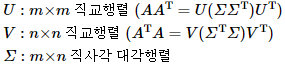
* 여기서 직교행렬이란 자신과 자신의 전치행렬의 곱 또는 이를 반대로 곱한 결과가 단위행렬이 되는 행렬을 말한다. 
* 또한 대각행렬이란 주대각선을 제외한 곳의 원소가 모두 0인 행렬을 의미한다.

* 이때 SVD로 나온 대각행렬의 대각 원소의 값을 행렬 A의 특이값이라고 한다. 

1) 전치 행렬 (Transposed Matrix)
* 전치행렬은 원래의 행렬에서 행과 열을 바꾼 행렬이다. 즉, 주 대각선을 축으로 반사 대칭으로 하여 얻은 행렬이다.
* 기호는 기존행렬 표현의 우측 위에 T를 붙인다.
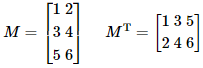
2) 단위 행렬 (Identity Matrix)
* 단위행렬은 주대각선의 원소가 모두 1이며, 나머지 원소는 모두 0인 정사각 행렬을 말한다. 보통 줄여서 대문자I로 표현
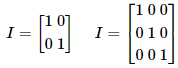
3) 역행렬 (Inverse Matrix)
* 행렬  A와 어떤 행렬을 곱했을 때, 결과로 단위행렬이 나온다면, 어떤 행렬을 A의 역행렬이라고 한다.

4) 직교 행렬(Orthogonal Matrix)
* 직교 행렬의 정의로 돌아가서, 실수 nxn행렬 A에 대해서 AxA^T= I를 만족하면서 A^TxA = I를 만족하면 행렬A를 직교행렬이라고 한다.

5) 대각 행렬(Diagonal Matrix)
* 대각행렬은 주대각선을 제외한 곳의 원소가 모두 0인 행렬을 말한다.
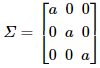

2.절단된 SVD(Truncated SVD)
---
* SVD를 풀 SVD(full SVD)라고 합니다. 하지만 LSA의 경우 풀 SVD에서 나온 3개의 행렬에서 일부 벡터들을 삭제시킨 절단된 SVD(truncated SVD)를 사용하게 된다.
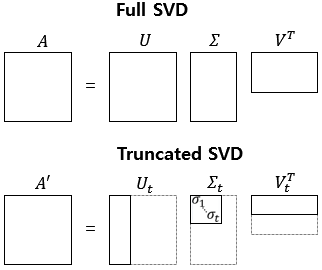
* 절단된 SVD는 대각 행렬 Σ의 대각 원소의 값 중에서 상위값 t개만 남게 된다. 
* 절단된 SVD를 수행하면 값의 손실이 일어나므로 기존의 행렬 A를 복구할 수 없다. 
* 또한, U행렬과 V행렬의 t열까지만 남기고, 여기서 t는 우리가 찾고자하는 토픽의 수를 반영한 하이퍼파라미터값이다.
* 하이퍼파라미터란 사용자가 직접 값을 선택하며 성능에 영향을 주는 매개변수를 말합니다.
* t를 선택하는 것은 쉽지 않은 일입니다. t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, t를 작게 잡아야만 노이즈를 제거할 수 있기 때문입니다.
* 일부 벡터들을 삭제하는 것을 데이터의 차원을 줄인다고도 말하는데, 데이터의 차원을 줄이게되면 당연히 풀 SVD를 하였을 때보다 직관적으로 계산 비용이 낮아지는 효과를 얻을 수 있습니다.
* 계산 비용이 낮아지는 것 외에도 상대적으로 중요하지 않은 정보를 삭제하는 효과를 갖고 있는데, 이는 영상 처리 분야에서는 노이즈를 제거한다는 의미를 갖고 자연어 처리 분야에서는 설명력이 낮은 정보를 삭제하고 설명력이 높은 정보를 남긴다는 의미를 갖고 있다.
* 즉, 다시 말하면 기존의 행렬에서는 드러나지 않았던 심층적인 의미를 확인할 수 있게 해줍니다.

3.잠재 의미 분석(Latent Semantic Analysis, LSA)
---
* 기존의 DTM이나 DTM에 단어의 중요도에 따른 가중치를 주었던 TF-IDF 행렬은 단어의 의미를 전혀 고려하지 못한다는 단점을 갖고 있다. 
* LSA는 기본적으로 DTM이나 TF-IDF 행렬에 절단된 SVD(truncated SVD)를 사용하여 차원을 축소시키고, 단어들의 잠재적인 의미를 끌어낸다는 아이디어를 갖고 있습니다.
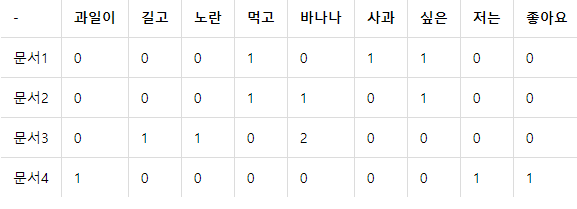
* 다음과 같이 DTM을 실제로 파이썬을 통해 살펴본다

In [1]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)  #4x9 크기를 가지는 DMT이 생성. 이에 대해서 풀 SVD를 수행

(4, 9)

In [2]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

In [3]:
print(U.round(2))
np.shape(U) #4 × 4의 크기를 가지는 직교 행렬 U

[[ 0.24  0.75  0.    0.62]
 [ 0.51  0.44 -0.   -0.74]
 [ 0.83 -0.49  0.    0.27]
 [ 0.    0.    1.   -0.  ]]


(4, 4)

In [4]:
print(s.round(2))
np.shape(s) #대각 행렬 s

[2.69 2.05 1.73 0.77]


(4,)

In [5]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S) #4 × 9의 크기를 가지는 대각 행렬 S

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


(4, 9)

In [6]:
print(VT.round(2)) #VT는 V의 전치행렬
np.shape(VT)

[[ 0.    0.31  0.31  0.28  0.8   0.09  0.28  0.    0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [-0.    0.35  0.35 -0.16 -0.25  0.8  -0.16  0.    0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


(9, 9)

In [8]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))  #지금까지 수행한 것이 풀 SVD

True

In [9]:
#절단된 SVD
S=S[:2,:2]
print(S.round(2))

[[2.69 0.  ]
 [0.   2.05]]


In [10]:
U=U[:,:2]
print(U.round(2))

[[ 0.24  0.75]
 [ 0.51  0.44]
 [ 0.83 -0.49]
 [ 0.    0.  ]]


In [11]:
VT=VT[:2,:]
print(VT.round(2))

[[ 0.    0.31  0.31  0.28  0.8   0.09  0.28  0.    0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [12]:
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


LSA의 장단점
---
* LSA는 쉽고 빠르게 구현이 가능할 뿐만 아니라 단어의 잠재적인 의미를 이끌어낼 수 있어 문서의 유사도 계산 등에서 좋은 성능을 보여준다는 장점을 갖고 있다.
* 하지만 VD의 특성상 이미 계산된 LSA에 새로운 데이터를 추가하여 계산하려고하면 보통 처음부터 다시 계산해야 합니다. 즉, 새로운 정보에 대해 업데이트가 어렵습니다. 
* 이는 최근 LSA 대신 Word2Vec 등 단어의 의미를 벡터화할 수 있는 또 다른 방법론인 인공 신경망 기반의 방법론이 각광받는 이유